In [13]:
import pandas as pd
import seaborn as sns
import os
import re

In [9]:
def get_local_csvs(directory="."):
    file_list = []
    for filename in os.listdir(directory):
        if os.path.isfile(os.path.join(directory, filename)):
            if filename.endswith(".csv"):
                file_list.append(filename)
    return file_list

directory_path = "."
files = get_local_csvs(directory_path)

print("List of files in the directory:")
for file in files:
    print(file)

List of files in the directory:
Base Decision Tree_ActualVSPred_RMSE_4.0743.csv
default_model_ActualVSPred_RMSE_2.5361.csv
XGBoost Base Model_ActualVSPred_RMSE_2.9019.csv
Best Decision Tree_ActualVSPred_RMSE_7.7609.csv
Tuned Decision Tree_ActualVSPred_RMSE_4.338.csv
Random Forest Best Model_ActualVSPred_RMSE_2.5361.csv
Random Forest Initial Model_ActualVSPred_RMSE_2.5361.csv


In [23]:
def read_csvs():
    """
    Import each of the files and merge them into a single dataframe
    """
    pattern = r"_ActualVSPred_RMSE_\d+(\.\d+)?"
    
    csv_list = get_local_csvs(".")
    dataframe_list = []
    for i in csv_list:
        dataframe = pd.read_csv(i)
        dataframe["Model"] = f'{re.sub(pattern, "", (i.replace(" ", "_"))).replace(".csv", "")}'
        dataframe_list.append(dataframe)
    
    df = pd.concat(dataframe_list)
    df.rename(columns={"predictions":"prediction"}, inplace=True)
    return df
    

In [24]:
actuals_vs_predictions_tree = read_csvs()

In [25]:
actuals_vs_predictions_tree

,actual,prediction,Model
0,0.279423,0.279542,Base_Decision_Tree
1,2.267615,2.327086,Base_Decision_Tree
2,22.415494,22.469890,Base_Decision_Tree
3,1.800661,2.257086,Base_Decision_Tree
4,14.311475,80.091533,Base_Decision_Tree
...,...,...,...
1111,0.507820,0.506721,Random_Forest_Initial_Model
1112,17.251436,14.554404,Random_Forest_Initial_Model
1113,1.350209,1.350492,Random_Forest_Initial_Model
1114,0.449092,1.110905,Random_Forest_Initial_Model


[Text(0.5, 1.0, 'preds_boxplot - Fentanyl')]

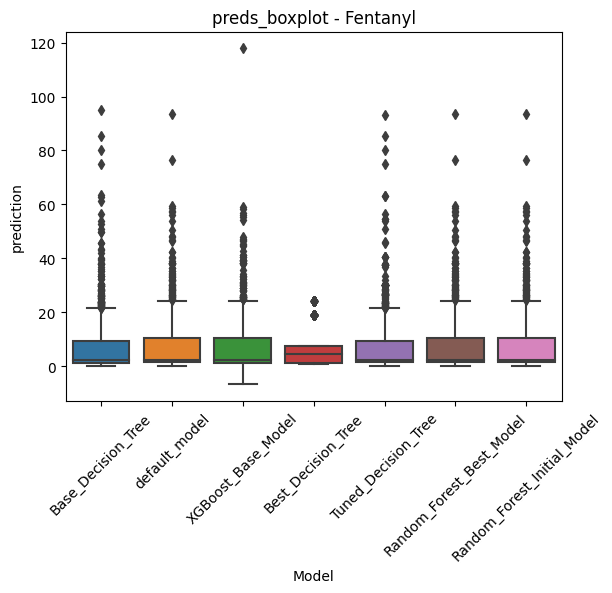

In [26]:
preds_boxplot = sns.boxplot(actuals_vs_predictions_tree, x="Model", y="prediction")
for item in preds_boxplot.get_xticklabels():
    item.set_rotation(45)

title = 'preds_boxplot - Fentanyl'
preds_boxplot.set(title=title)


In [ ]:
preds_boxplot = sns.boxplot(actuals_vs_predictions_tree, x="Model", y="actual")
for item in preds_boxplot.get_xticklabels():
    item.set_rotation(45)

title = 'preds_boxplot - Fentanyl'
preds_boxplot.set(title=title)